In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import kurtosis
from scipy.stats import skew

In [124]:
data = pd.read_csv('F:\\Data Science\\Data sets\\ToyotaCorolla.csv',encoding = 'latin1')
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [125]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [127]:
data1=data.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis=1)
data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [128]:
data1.shape

(1436, 9)

In [129]:
data1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [130]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [131]:
data1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [132]:
print(kurtosis(data1.Price))

3.720603948160326


In [133]:
print(kurtosis(data1))

[ 3.72060395e+00 -8.05412769e-02  1.67501988e+00  8.80152096e+00
  9.27469571e+02 -1.87241891e+00  3.75681492e+01  4.27921802e+00
  1.92913722e+01]


In [134]:
print(skew(data1.Price))

1.702104639170028


In [135]:
print(skew(data1))

[ 1.70210464 -0.82583808  1.0148507   0.95483692 27.4031301  -0.07631517
  2.28157329  1.99175056  3.10539127]


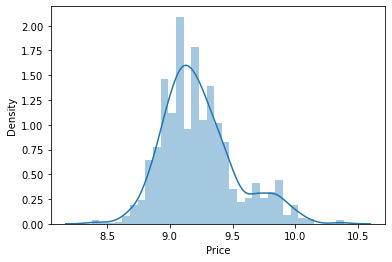

<Figure size 432x288 with 0 Axes>

In [136]:
data['Price']=np.log(data1['Price'])
sns.distplot(data['Price'])
fig=plt.figure()

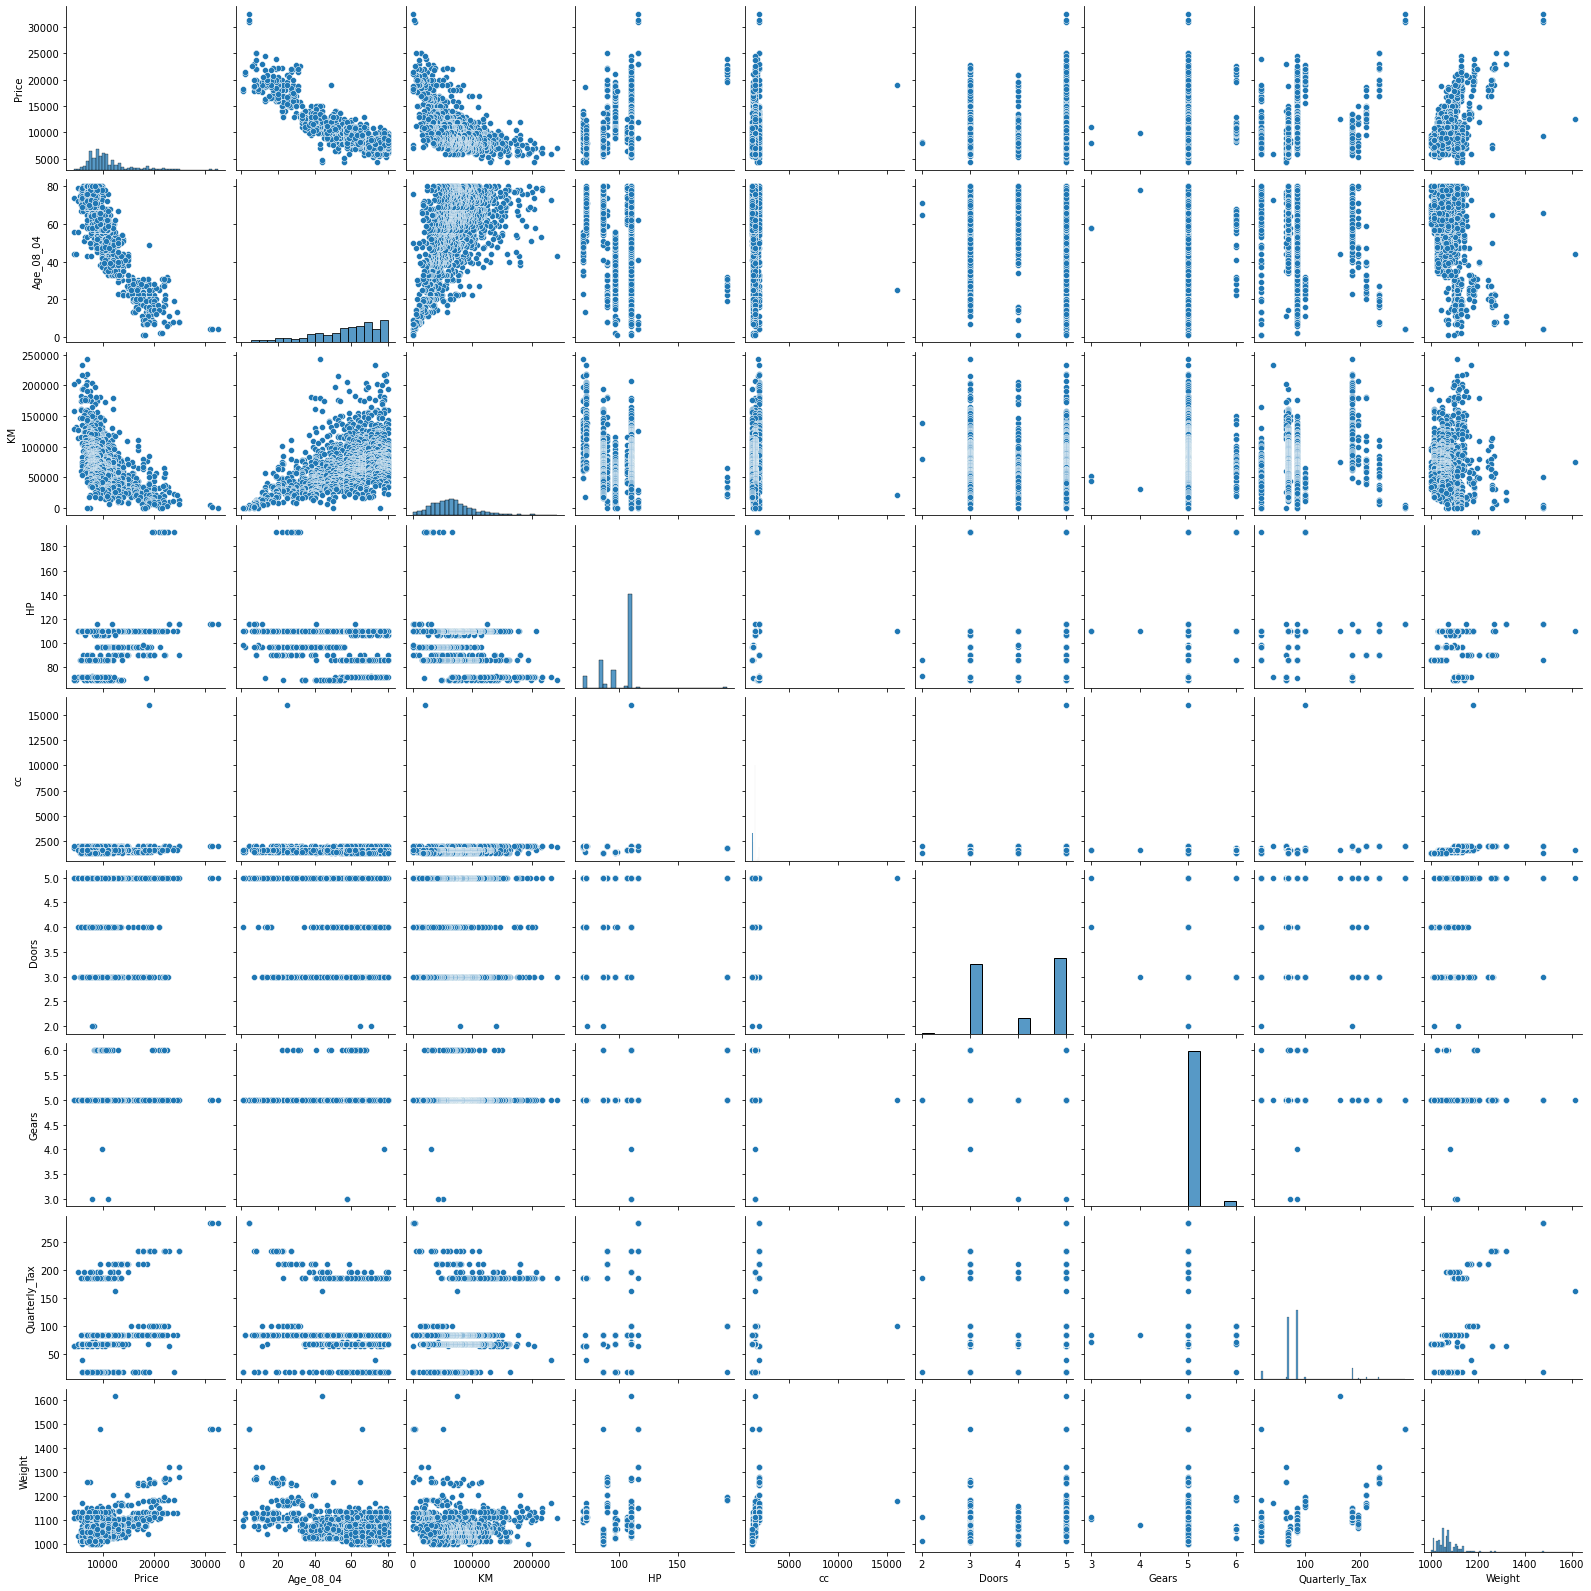

In [137]:
sns.pairplot(data1)

<AxesSubplot:>

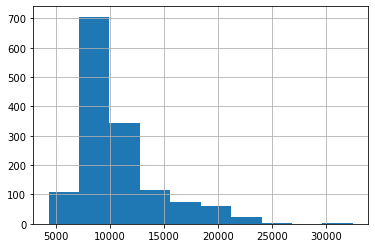

In [138]:
data1['Price'].hist()

<AxesSubplot:>

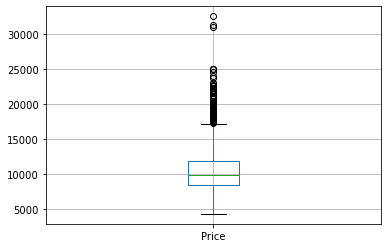

In [139]:
data1.boxplot(column=['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

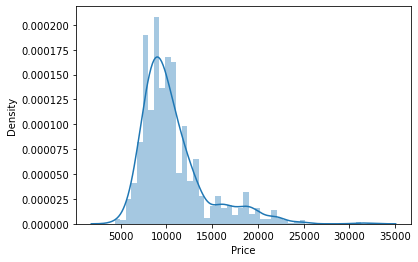

In [140]:
sns.distplot(data1['Price'])

In [141]:
data1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [142]:
data1['Age'] = data1['Age_08_04']
data1['QT'] = data1['Quarterly_Tax']
data1 = data1.drop(['Age_08_04','Quarterly_Tax'],axis=1)
data1

,Price,KM,HP,cc,Doors,Gears,Weight,Age,QT
0,13500,46986,90,2000,3,5,1165,23,210
1,13750,72937,90,2000,3,5,1165,23,210
2,13950,41711,90,2000,3,5,1165,24,210
3,14950,48000,90,2000,3,5,1165,26,210
4,13750,38500,90,2000,3,5,1170,30,210
...,...,...,...,...,...,...,...,...,...
1431,7500,20544,86,1300,3,5,1025,69,69
1432,10845,19000,86,1300,3,5,1015,72,69
1433,8500,17016,86,1300,3,5,1015,71,69
1434,7250,16916,86,1300,3,5,1015,70,69


In [143]:
model = smf.ols('Price~KM+HP+cc+Doors+Gears+Weight+Age+QT',data=data1).fit()
model

In [144]:
model.fittedvalues

0       16812.580505
1       16272.355186
2       16800.732460
3       16426.496731
4       16222.419010
            ...     
1431     8793.758297
1432     8291.338421
1433     8454.298007
1434     8578.038121
1435    10402.438333
Length: 1436, dtype: float64

In [145]:
model.resid

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

In [146]:
model.rsquared, model.rsquared_adj

(0.8637627463428192, 0.8629989775766963)

In [147]:
model.params

Intercept   -5573.106358
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
Weight         16.958632
Age          -121.658402
QT              3.949081
dtype: float64

In [148]:
data1['Prediction']=model.fittedvalues
data1['Errors']=model.resid
data1

,Price,KM,HP,cc,Doors,Gears,Weight,Age,QT,Prediction,Errors
0,13500,46986,90,2000,3,5,1165,23,210,16812.580505,-3312.580505
1,13750,72937,90,2000,3,5,1165,23,210,16272.355186,-2522.355186
2,13950,41711,90,2000,3,5,1165,24,210,16800.732460,-2850.732460
3,14950,48000,90,2000,3,5,1165,26,210,16426.496731,-1476.496731
4,13750,38500,90,2000,3,5,1170,30,210,16222.419010,-2472.419010
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,20544,86,1300,3,5,1025,69,69,8793.758297,-1293.758297
1432,10845,19000,86,1300,3,5,1015,72,69,8291.338421,2553.661579
1433,8500,17016,86,1300,3,5,1015,71,69,8454.298007,45.701993
1434,7250,16916,86,1300,3,5,1015,70,69,8578.038121,-1328.038121


Beta coefficient interpretation
* Given a unit change in Age, Price variable decreases by 0.010312
* Given a unit change in KM, Price variable decreases by 0.000002
* Given a unit change in HP,Price variable increases by 0.002602
* Given a unit change in cc, Price variable decreases by 0.000004
* Given a unit change in Doors, Price variable increases by 0.010666
* Given a unit change in Gears, Price variable increases by 0.068514
* Given a unit change in Weight, Price variable increases by 0.000681
* Given a unit change in QT, Price variable increases by 0.000617



In [149]:
print(model.pvalues, '\n','\n', model.tvalues)

Intercept     8.241949e-05
KM            7.538439e-57
HP            3.757218e-28
cc            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
Weight        2.048576e-52
Age          3.354724e-288
QT            2.619148e-03
dtype: float64 
 
 Intercept    -3.948666
KM          -16.621622
HP           11.241018
cc           -1.344222
Doors        -0.040410
Gears         3.016007
Weight       15.879803
Age         -46.511852
QT            3.014535
dtype: float64


#### Null Hypothesis - The independent variable is not at all significantly related to the dependent variables.
#### Alternate Hypothesis - The independent variable is significantly related to the dependent variables.

In [150]:
model.pvalues

Intercept     8.241949e-05
KM            7.538439e-57
HP            3.757218e-28
cc            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
Weight        2.048576e-52
Age          3.354724e-288
QT            2.619148e-03
dtype: float64

Since all the p values are <0.05, the alternate hypothesis is true.

In [151]:
p_age = smf.ols('Price~Age',data = data1).fit()
print(p_age.tvalues, '\n', p_age.pvalues)

Intercept    138.907847
Age          -68.978267
dtype: float64 
 Intercept    0.0
Age          0.0
dtype: float64


In [152]:
p_KM = smf.ols('Price~KM',data = data1).fit()
print(p_KM.tvalues, '\n', p_KM.pvalues)

Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


In [153]:
p_HP = smf.ols('Price~HP',data = data1).fit()
print(p_HP.tvalues, '\n', p_HP.pvalues)

Intercept     4.803134
HP           12.567862
dtype: float64 
 Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64


In [154]:
p_cc = smf.ols('Price~cc',data = data1).fit()
print(p_cc.tvalues, '\n', p_cc.pvalues)

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [155]:
p_Doors = smf.ols('Price~Doors',data = data1).fit()
print(p_Doors.tvalues, '\n', p_Doors.pvalues)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [156]:
p_Gears = smf.ols('Price~Gears',data = data1).fit()
print(p_Gears.tvalues, '\n', p_Gears.pvalues)

Intercept    1.814534
Gears        2.394401
dtype: float64 
 Intercept    0.069804
Gears        0.016775
dtype: float64


In [157]:
p_Weight = smf.ols('Price~Weight',data = data1).fit()
print(p_Weight.tvalues, '\n', p_Weight.pvalues)

Intercept   -20.263590
Weight       27.045855
dtype: float64 
 Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64


In [158]:
p_QT = smf.ols('Price~QT',data = data1).fit()
print(p_QT.tvalues, '\n', p_QT.pvalues)

Intercept    41.330311
QT            8.507487
dtype: float64 
 Intercept    1.532168e-246
QT            4.407393e-17
dtype: float64


Calculating VIF

In [159]:
rsq_age = smf.ols('Price~Age',data = data1).fit().rsquared
vif_age= 1/(1-(rsq_age))

rsq_KM = smf.ols('Price~KM',data = data1).fit().rsquared
vif_KM = 1/(1-(rsq_KM))

rsq_HP = smf.ols('Price~HP',data = data1).fit().rsquared
vif_HP= 1/(1-(rsq_HP))

rsq_cc = smf.ols('Price~cc',data = data1).fit().rsquared
vif_cc= 1/(1-(rsq_cc))

rsq_Doors = smf.ols('Price~Doors',data = data1).fit().rsquared
vif_Doors= 1/(1-(rsq_Doors))

rsq_Gears = smf.ols('Price~Gears',data = data1).fit().rsquared
vif_Gears = 1/(1-(rsq_Gears))

rsq_Weight = smf.ols('Price~Weight',data = data1).fit().rsquared
vif_Weight = 1/(1-(rsq_Weight))

rsq_QT = smf.ols('Price~QT',data = data1).fit().rsquared
vif_QT = 1/(1-(rsq_QT))

d1 = {'Variables':['Age','KM', 'HP','cc','Doors','Gears', 'Weight', ' QT'], 'VIF':[vif_age, vif_KM, vif_HP, vif_cc, vif_Doors, vif_Gears, vif_Weight, vif_QT]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Age,4.317993
1,KM,1.481162
2,HP,1.110147
3,cc,1.016234
4,Doors,1.035567
5,Gears,1.003998
6,Weight,1.510096
7,QT,1.050472


Residual Analysis

Test for Normality of Residuals (Q_Q Plot)

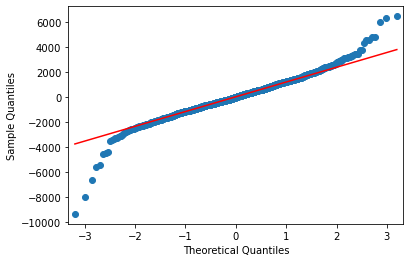

In [160]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid , line='q')
plt.title=('Normal Q-Q Plot')
plt.show()

In [161]:
list(np.where(model.resid< -0.4))

[array([   0,    1,    2,    3,    4,    5,    9,   11,   12,   25,   30,
          31,   33,   34,   37,   39,   40,   42,   44,   48,   50,   54,
          55,   57,   60,   67,   71,   73,   79,   82,   86,   87,   93,
          96,   97,  101,  117,  122,  124,  129,  130,  131,  132,  133,
         135,  137,  140,  145,  155,  164,  184,  185,  186,  187,  188,
         189,  191,  192,  193,  195,  198,  199,  200,  202,  203,  206,
         207,  208,  209,  212,  213,  214,  215,  217,  218,  219,  220,
         221,  222,  224,  225,  226,  227,  228,  229,  231,  234,  235,
         236,  239,  240,  241,  242,  243,  244,  246,  249,  250,  251,
         252,  254,  255,  256,  259,  261,  263,  264,  265,  266,  267,
         268,  269,  270,  271,  272,  275,  277,  280,  281,  282,  284,
         285,  286,  287,  288,  289,  290,  292,  293,  295,  296,  297,
         298,  300,  301,  303,  305,  306,  308,  309,  310,  312,  313,
         314,  316,  317,  318,  319, 

<AxesSubplot:>

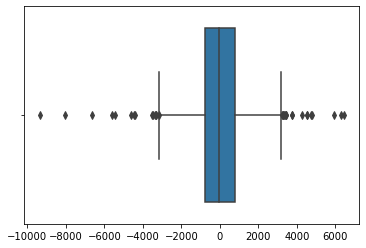

In [162]:
sns.boxplot(model.resid)

<AxesSubplot:xlabel='Errors', ylabel='Count'>

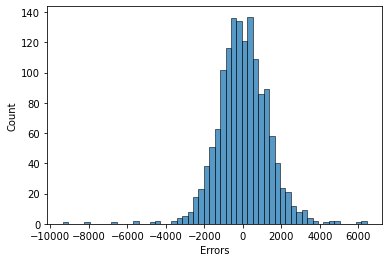

In [163]:
sns.histplot(data1['Errors'])

<AxesSubplot:xlabel='Errors', ylabel='Density'>

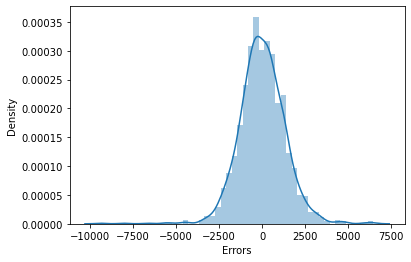

In [164]:
sns.distplot(data1['Errors'])

Residual Plot for Homoscedesticity

In [165]:
def get_standardized_values(vals):
    return(vals - vals.mean())/vals.std()

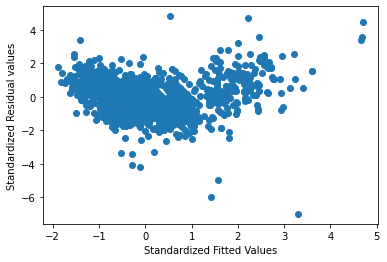

In [166]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual values')
plt.show()

In [167]:
get_standardized_values(model.resid).mean()

-8.690046515868216e-17

Residual Vs Regressors

eval_env: 1


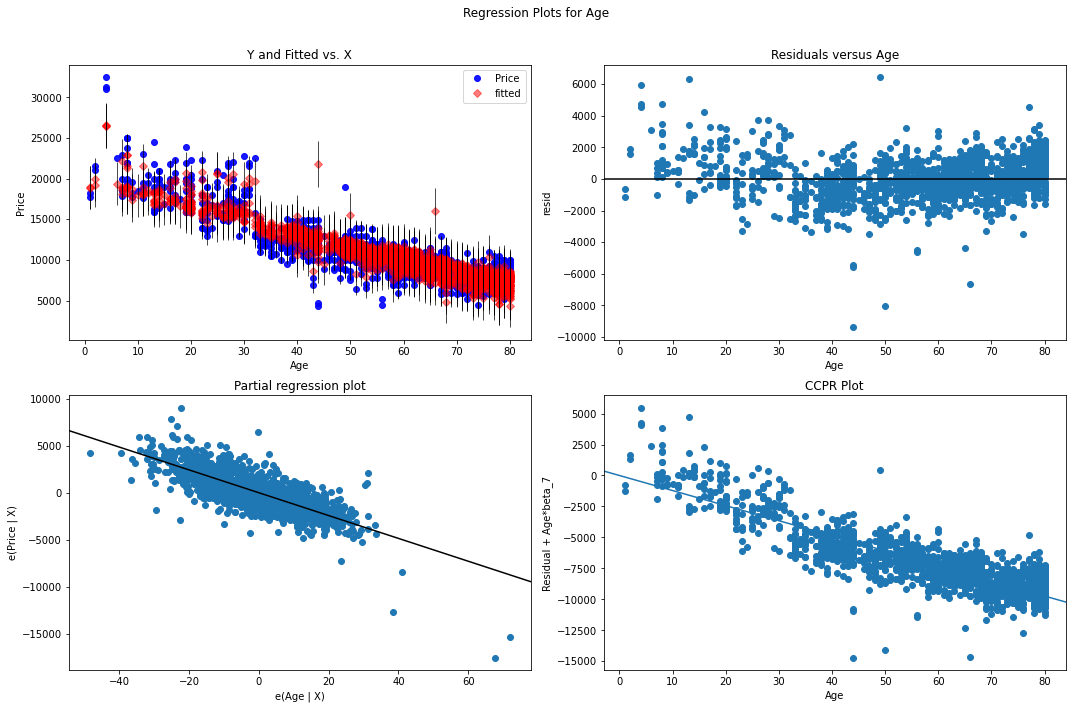

In [168]:
fig = plt.figure(figsize=(15,10))
fid = sm.graphics.plot_regress_exog(model, 'Age', fig = fig)
plt.show()

eval_env: 1


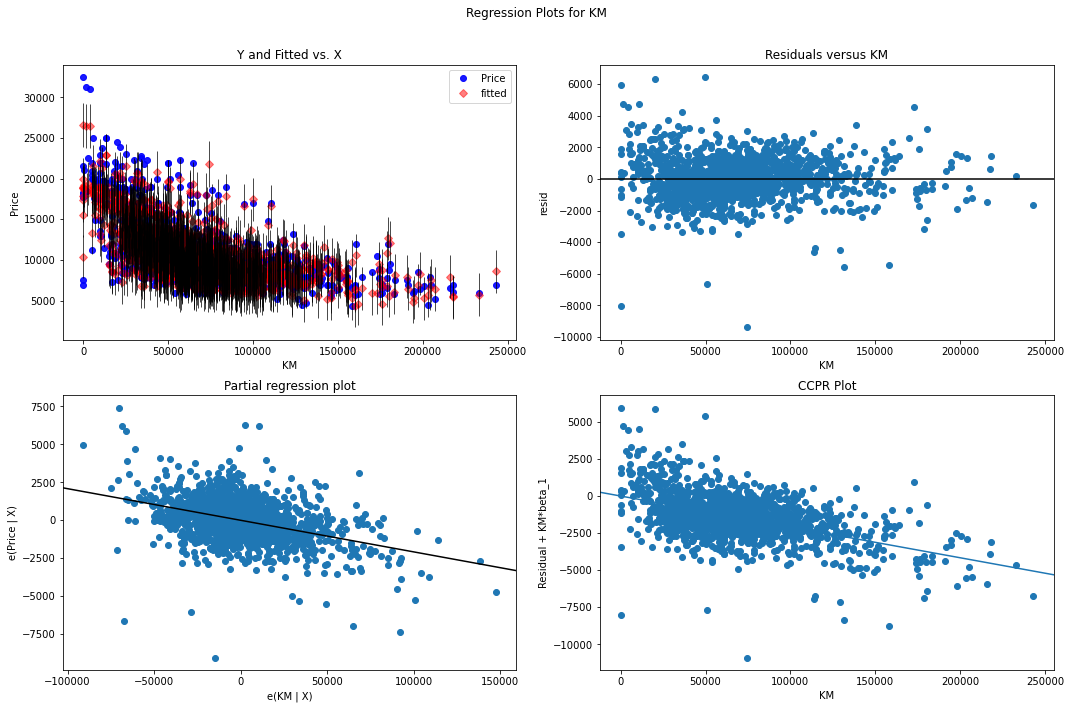

In [169]:
fig = plt.figure(figsize=(15,10))
fid = sm.graphics.plot_regress_exog(model, 'KM', fig = fig)
plt.show()

eval_env: 1


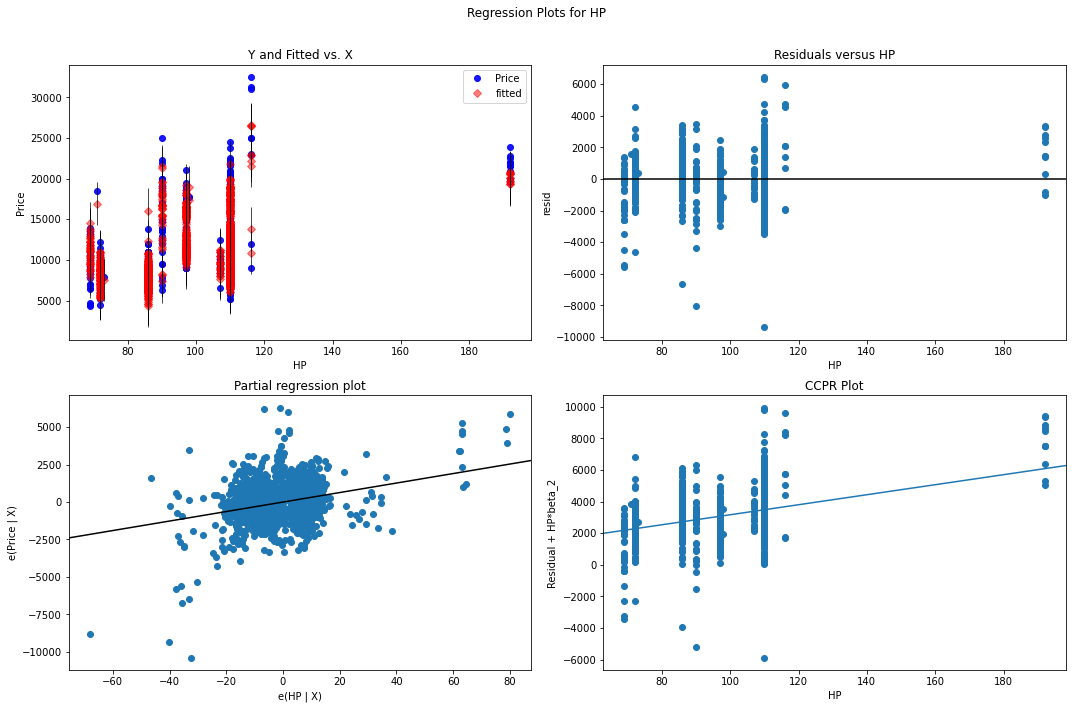

In [170]:
fig = plt.figure(figsize=(15,10))
fid = sm.graphics.plot_regress_exog(model, 'HP', fig = fig)
plt.show()

eval_env: 1


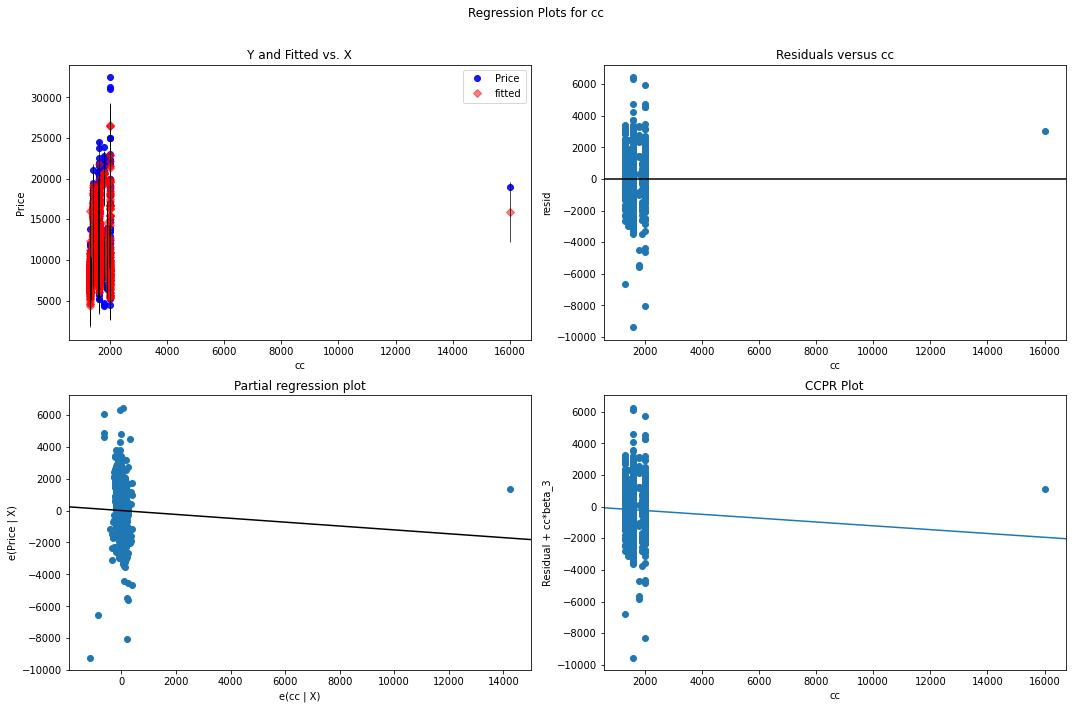

In [171]:
fig = plt.figure(figsize=(15,10))
fid = sm.graphics.plot_regress_exog(model, 'cc', fig = fig)
plt.show()

eval_env: 1


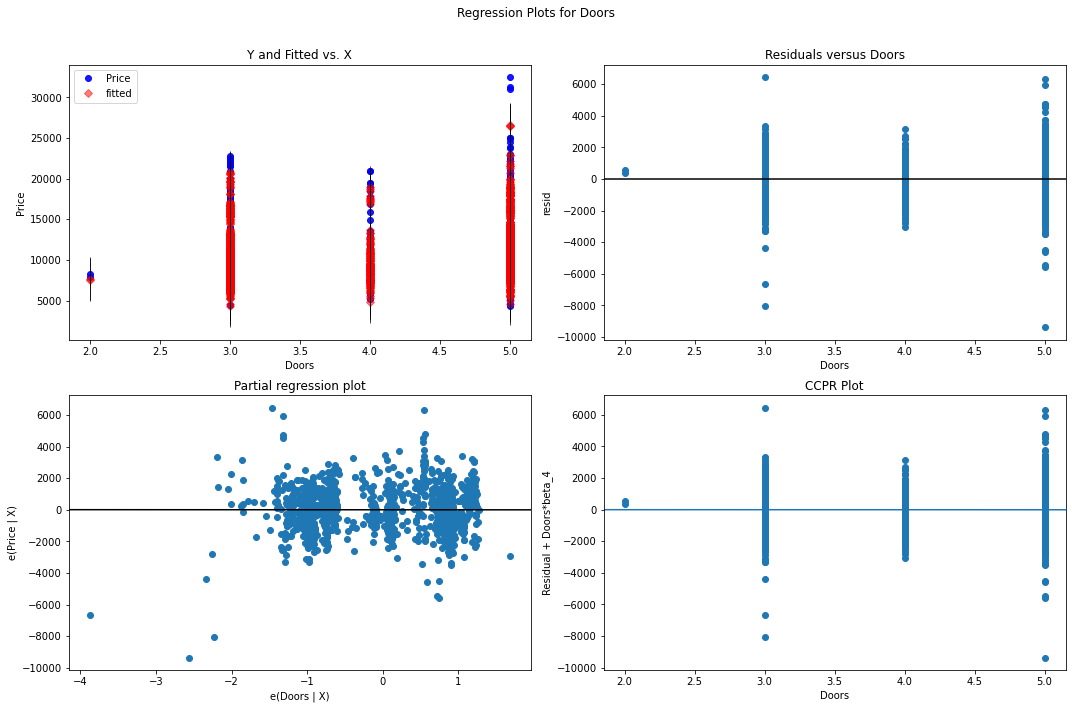

In [172]:
fig = plt.figure(figsize=(15,10))
fid = sm.graphics.plot_regress_exog(model, 'Doors', fig = fig)
plt.show()

eval_env: 1


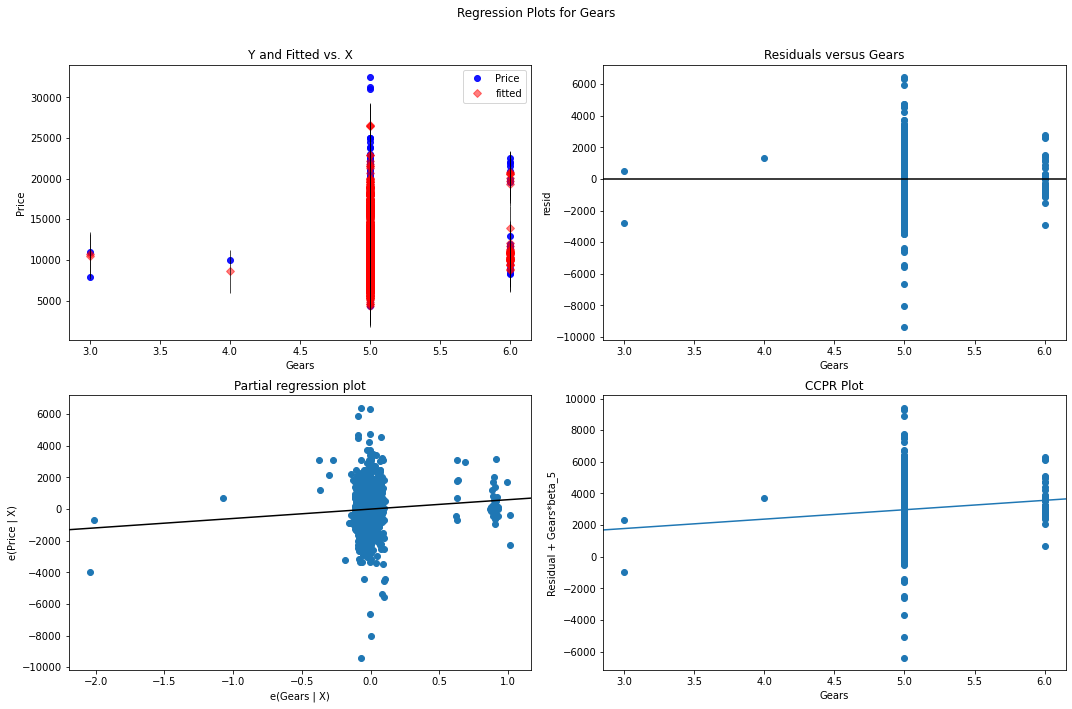

In [173]:
fig = plt.figure(figsize=(15,10))
fid = sm.graphics.plot_regress_exog(model, 'Gears', fig = fig)
plt.show()

eval_env: 1


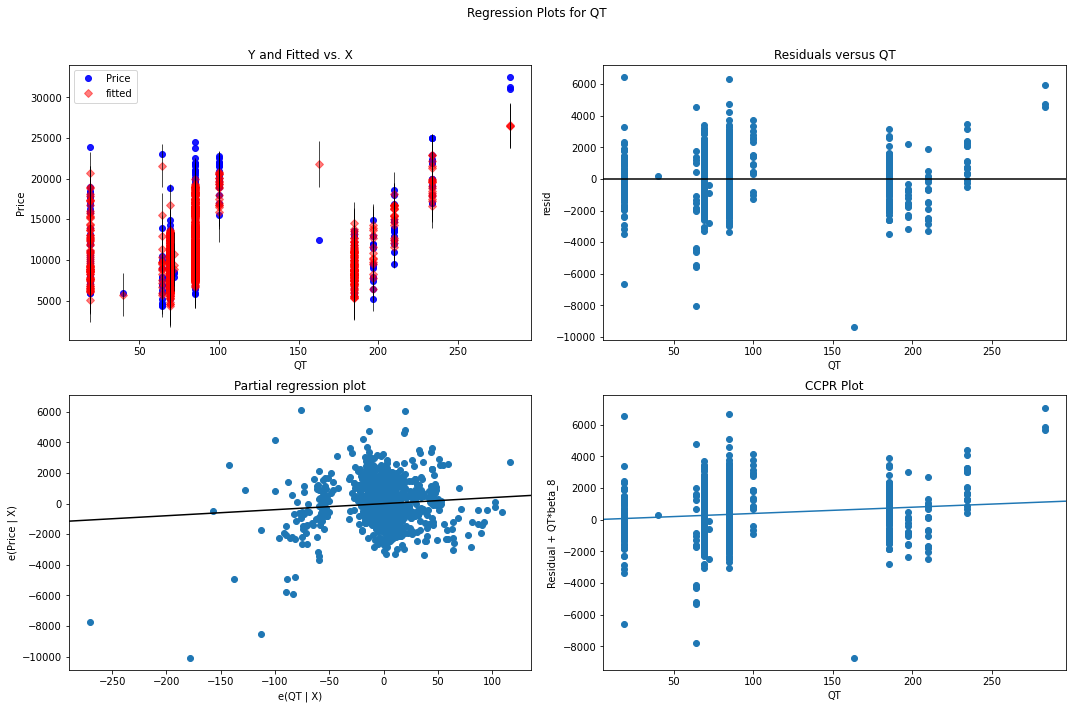

In [174]:
fig = plt.figure(figsize=(15,10))
fid = sm.graphics.plot_regress_exog(model, 'QT', fig = fig)
plt.show()

Cooks Distance

In [175]:
data1.shape

(1436, 11)

In [176]:
model.influence = model.get_influence()
(c,_) = model.get_influence().cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762354e-07, 6.97878368e-04, 1.08627724e-02])

Text(0, 0.5, 'Cooks Distance')

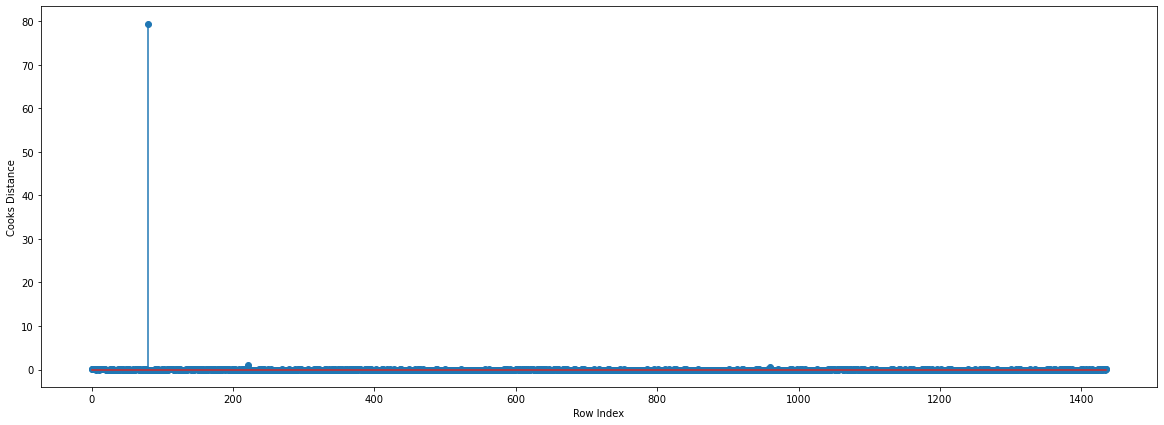

In [177]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data1)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

In [178]:
np.argmax(c), np.max(c)

(80, 79.52010624119542)

High Influence Points

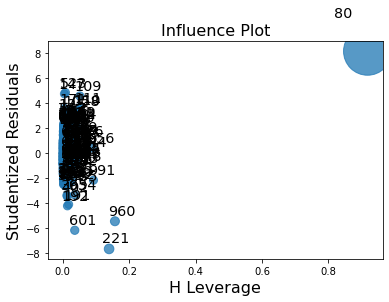

In [179]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [180]:
data1.shape

(1436, 11)

In [181]:
k = 11
n = 1436
leverage_cutoff = (3* (k+1)/n)
leverage_cutoff

0.025069637883008356

In [182]:
data1[data1.index.isin([80])]

,Price,KM,HP,cc,Doors,Gears,Weight,Age,QT,Prediction,Errors
80,18950,20019,110,16000,5,5,1180,25,100,15885.600444,3064.399556


In [183]:
data1.head()

,Price,KM,HP,cc,Doors,Gears,Weight,Age,QT,Prediction,Errors
0,13500,46986,90,2000,3,5,1165,23,210,16812.580505,-3312.580505
1,13750,72937,90,2000,3,5,1165,23,210,16272.355186,-2522.355186
2,13950,41711,90,2000,3,5,1165,24,210,16800.732460,-2850.732460
3,14950,48000,90,2000,3,5,1165,26,210,16426.496731,-1476.496731
4,13750,38500,90,2000,3,5,1170,30,210,16222.419010,-2472.419010


Improving the model

In [184]:
data1 = data1.drop(data1.index[80], axis = 0).reset_index(drop= True)
data1

,Price,KM,HP,cc,Doors,Gears,Weight,Age,QT,Prediction,Errors
0,13500,46986,90,2000,3,5,1165,23,210,16812.580505,-3312.580505
1,13750,72937,90,2000,3,5,1165,23,210,16272.355186,-2522.355186
2,13950,41711,90,2000,3,5,1165,24,210,16800.732460,-2850.732460
3,14950,48000,90,2000,3,5,1165,26,210,16426.496731,-1476.496731
4,13750,38500,90,2000,3,5,1170,30,210,16222.419010,-2472.419010
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,20544,86,1300,3,5,1025,69,69,8793.758297,-1293.758297
1431,10845,19000,86,1300,3,5,1015,72,69,8291.338421,2553.661579
1432,8500,17016,86,1300,3,5,1015,71,69,8454.298007,45.701993
1433,7250,16916,86,1300,3,5,1015,70,69,8578.038121,-1328.038121


In [185]:
data1.shape

(1435, 11)

Build Model

In [186]:
while np.max(c) >0.3:
    model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Weight+QT', data = data1).fit()
    (c,_) = model.get_influence().cooks_distance
    c
    np.argmax(c), np.max(c)
    data1 = data1.drop(data1.index[[np.argmax(c)]], axis = 0).reset_index(drop=True)
    data1
else:
    final = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Weight+QT', data = data1).fit()
    final.rsquared, final.aic
    print('Thus model accuracy is improved to ', final.rsquared)

Thus model accuracy is improved to  0.8914204825569462


In [187]:
final.rsquared

0.8914204825569462

Model Prediction

In [190]:
new = pd.DataFrame({'Age':90,'KM':90000,'HP':95,'cc':1500,'Doors':5,'Gears':5,'Weight':1800,'QT':200}, index=[0])
new

,Age,KM,HP,cc,Doors,Gears,Weight,QT
0,90,90000,95,1500,5,5,1800,200


In [191]:
final.predict(new)

0    31160.625113
dtype: float64

In [193]:
predict = final.predict(data1)
predict

0       16337.781584
1       15881.055012
2       16321.221436
3       15991.741898
4       15888.735784
            ...     
1426     9167.793583
1427     8531.994520
1428     8676.309982
1429     8787.467845
1430    10989.020138
Length: 1431, dtype: float64

In [195]:
model.rsquared

0.8894191849749751

In [196]:
final.rsquared

0.8914204825569462

In [197]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1431.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:00:08   Log-Likelihood:                -12191.
No. Observations:                1432   AIC:                         2.440e+04
Df Residuals:                    1423   BIC:                         2.445e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.618e+04   1419.607    -11.399      0.000    -1.9e+04   -1.34e+04
Age         -110.3302      2.444    -45.149      0.000    -115.124    -105.537
KM            -0.0177      0.001    -14.976      0.000      -0.020      -0.015
HP            34.3032      2.712     12.647      0.000      28.983      39.624
cc            -3.6876      0.297    -12.420      0.000      -4.270      -3.105
Doors       -144.0434     36.899     -3.904      0.000    -216.426     -71.661
Gears        468.2073    177.621      2.636      0.008     119.779     816.635
Weight        32.1958      1.283     25.085      0.000      29.678      34.713
QT             3.6780      1.362      2.701      0.007       1.007       6.349
==============================================================================
Omnibus:                       75.065   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.214
Skew:                           0.120   Prob(JB):                     6.28e-56
Kurtosis:                       5.050   Cond. No.                     3.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [198]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1459.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:00:15   Log-Likelihood:                -12169.
No. Observations:                1431   AIC:                         2.436e+04
Df Residuals:                    1422   BIC:                         2.440e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.731e+04   1423.084    -12.162      0.000   -2.01e+04   -1.45e+04
Age         -109.3979      2.428    -45.058      0.000    -114.161    -104.635
KM            -0.0176      0.001    -15.031      0.000      -0.020      -0.015
HP            33.0345      2.698     12.242      0.000      27.741      38.328
cc            -3.6666      0.294    -12.462      0.000      -4.244      -3.089
Doors       -161.2810     36.711     -4.393      0.000    -233.295     -89.268
Gears        461.7826    176.006      2.624      0.009     116.523     807.042
Weight        33.4779      1.295     25.848      0.000      30.937      36.019
QT             2.4869      1.368      1.817      0.069      -0.197       5.171
==============================================================================
Omnibus:                       68.702   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.620
Skew:                           0.180   Prob(JB):                     2.02e-43
Kurtosis:                       4.780   Cond. No.                     3.52e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""